### Investigate null student and scored dates
   - in
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime

In [1]:
%%capture

%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf  = load_df('filterDf')

###### Create dataframe of null dates

In [3]:
nullDf = filterDf.filter(F.col('student_start_datetime').isNull())

nullDf.count()

749

749 null observations

###### Date statistics

In [4]:
date_statisticts(nullDf, ['scored_datetime', 'student_start_datetime', 'student_stop_datetime', 'was_fully_scored_datetime'])

,distinct,null,min,max
scored_datetime,65,36,2019-08-21,2019-11-07
student_start_datetime,0,749,None,None
student_stop_datetime,0,749,None,None
was_fully_scored_datetime,0,749,None,None


###### Display distinct values

In [5]:
distinct_val(nullDf)

,0
assignment_attempt_number (aa),1
assignment_max_attempts (a),1
ced_assignment_type_code (a),assessment
is_affecting_grade (a),True
is_force_scored (aa),False
is_manual_scoring_required (aa),False
org_id (o),19164
student_start_datetime (aa),NaT
student_stop_datetime (aa),NaT
was_fully_scored_datetime (aa),NaT


- assignment_attempt_number = 1
- assignment_max_attempts = 1
- ced_assignment_type_code = assessment
  - A majority (76,172) of observations have this code
- is_affecting_grade = True
- is_force_scored = False
- is_manual_scoring_required = False
- org_id = 19164
  - All from one organization
- Null values
  - All "Assessment Attempt"
  - student_start_datetime
  - student_stop_datetime
  - was_fully_scored_datetime
  - was_in_progress_datetime
  - was_submitted_datetime_actual

###### Compare dates with full sample

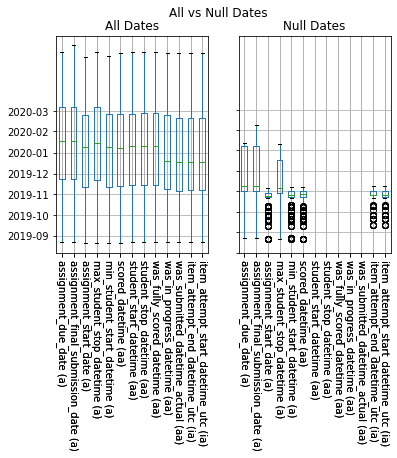

In [6]:
dual_date_boxplot(
    get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Null dates
  - All assesment attempt (aa)
    - except scored_datetime
- Item Attempt (ia)
  - between 11/15 and 10/15

##### Conclusion
- Appears to be for a limited date range and one org
- Will remove null observations

###### Test imputation

In [11]:
# Impute the dates then count records with null date
null2Df = remove_749_to_750_null_dates(filterDf)
null2Df.filter(F.col('student_start_datetime').isNull()).count()

36

In [13]:
distinct_val(null2Df.filter(F.col('student_start_datetime').isNull()))

,0
assessment_id (a),332151
assessment_instance_id (a),481025
assignment_attempt_number (aa),1
assignment_due_date (a),2019-11-09 05:59:00
assignment_final_submission_date (a),2019-11-09 05:59:00
assignment_max_attempts (a),1
assignment_start_date (a),2019-10-30 05:00:00
ced_assignment_type_code (a),assessment
final_score_unweighted (aa),0
is_affecting_grade (a),True


In [8]:
finish_todo('Investigate null student and scored dates')
add_todo('Remove student start or stop null dates')

Finished: Investigate 749 t0 750 null dates
Todo: Impute 749 t0 750 null dates
